In [5]:
import pandas as pd
from sqlalchemy import create_engine

# Create the SQLAlchemy engine
engine = create_engine(
    'mssql+pyodbc://DELL7490\\MSSQLSERVER01/RealEstateData?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'
)

# Query the data from SQL Server
query = "SELECT * FROM [dbo].[Real estate valuation data set]"
df = pd.read_sql(query, engine)

# Display the first few rows to confirm loading
print(df.head())




   No  X1_transaction_date  X2_house_age  \
0   1          2012.916992          32.0   
1   2          2012.916992          19.5   
2   3          2013.583008          13.3   
3   4          2013.500000          13.3   
4   5          2012.833008           5.0   

   X3_distance_to_the_nearest_MRT_station  X4_number_of_convenience_stores  \
0                               84.878822                               10   
1                              306.594696                                9   
2                              561.984497                                5   
3                              561.984497                                5   
4                              390.568390                                5   

   X5_latitude  X6_longitude  Y_house_price_of_unit_area  
0    24.982981    121.540237                   37.900002  
1    24.980339    121.539513                   42.200001  
2    24.987459    121.543907                   47.299999  
3    24.987459    121.543907  

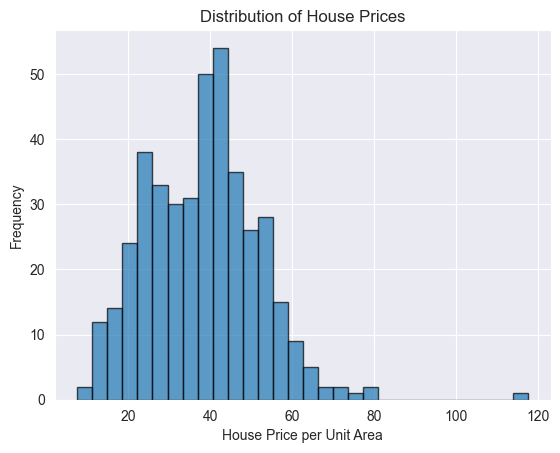

In [15]:
import matplotlib.pyplot as plt
# Plot histogram for 'Y house price of unit area'
df['Y_house_price_of_unit_area'].plot.hist(bins=30, edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Distribution of House Prices')
plt.xlabel('House Price per Unit Area')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [7]:
# Categorizing 'Y house price of unit area' into two categories
df['price_category'] = pd.cut(df['Y_house_price_of_unit_area'], bins=[0, 40, 120], labels=[0, 1])

# Verify the new column
print(df['price_category'].value_counts())

price_category
0    224
1    190
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Y_house_price_of_unit_area', 'price_category'])
y = df['price_category']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Training set size: 331, Test set size: 83


In [9]:
#Logic Regression 
from sklearn.linear_model import LogisticRegression

# Initialize and train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Evaluate on test set
logreg_score = logreg.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {logreg_score}")

Logistic Regression Accuracy: 0.8192771084337349


In [10]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize and train decision tree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Evaluate on test set
tree_score = tree.score(X_test, y_test)
print(f"Decision Tree Accuracy: {tree_score}")

Decision Tree Accuracy: 0.7590361445783133


In [11]:
#Class distribution balance or not 
#Much balanced the difference between two options is 8.22%
print(y.value_counts(normalize=True))

price_category
0    0.541063
1    0.458937
Name: proportion, dtype: float64


In [12]:
#Evaluation using classification report 
# Always best to use this compared to class distribution for more accuracy 
from sklearn.metrics import classification_report

# Assuming you have trained your models and made predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_tree = tree.predict(X_test)

# Generate classification reports for both models
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        49
           1       0.76      0.82      0.79        34

    accuracy                           0.82        83
   macro avg       0.81      0.82      0.82        83
weighted avg       0.82      0.82      0.82        83

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        49
           1       0.69      0.74      0.71        34

    accuracy                           0.76        83
   macro avg       0.75      0.76      0.75        83
weighted avg       0.76      0.76      0.76        83



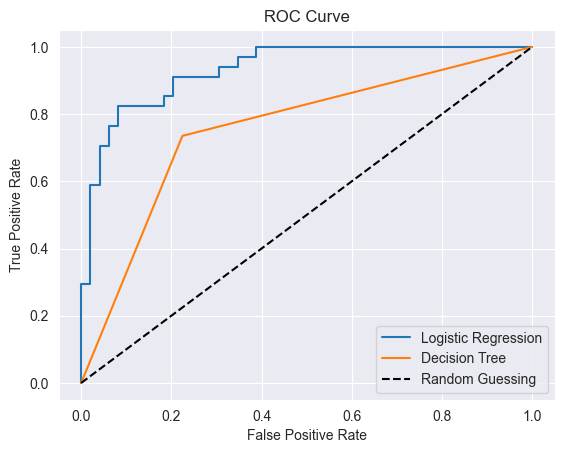

Logistic Regression AUC: 0.9327731092436975
Decision Tree AUC: 0.7554021608643458


In [13]:
#Evaluation metrics and ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for both models
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_proba_tree = tree.predict_proba(X_test)[:, 1]

# Compute ROC curve for both models
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)

# Plot ROC curves
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_tree, tpr_tree, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate AUC scores for both models
auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
auc_tree = roc_auc_score(y_test, y_pred_proba_tree)
print(f"Logistic Regression AUC: {auc_logreg}")
print(f"Decision Tree AUC: {auc_tree}")

In [ ]:
#Logistic Regression (AUC = 0.93): Excellent performance.
#Decision Tree (AUC = 0.76): Moderate performance but worse than Logistic Regression.
#The dashed line represents random guessing (AUC = 0.5), which serves as a baseline.

#The Logistic Regression model has a much better ability to distinguish between classes (as indicated by its higher AUC of 0.93).
#The Decision Tree model has a lower AUC (0.76), showing that it performs moderately well but not as good as Logistic Regression.

#Since Logistic Regression model has an AUC of 0.93, it suggests that the model is making very few mistakes in terms of false positives and false negatives, and is a strong performer